## MD MEHER HASSAN CHOWDHIRY
## 1155645
## The Entire Code solely done by me

## Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # Ploting the diagrams
from sklearn.preprocessing import StandardScaler 

# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dense, Softmax, Conv2D, MaxPooling2D

## Load Data

In [4]:
df=pd.read_csv("diamonds.csv")

In [5]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 11)

In [8]:
df.info

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

       

In [9]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [10]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
import seaborn as sns 

C:\Users\RAMBO\anaconda3\envs\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='z'>

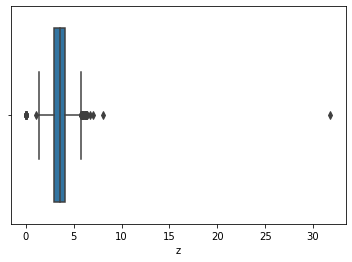

In [13]:
## checking outliers
'''fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Data Setdeki Outliersler')

sns.boxplot(ax=axes[0, 0], data = df['price'])
sns.boxplot(ax=axes[0, 1], data = df['depth'])
sns.boxplot(ax=axes[0, 2], data = df['table'])
sns.boxplot(ax=axes[1, 0], data = df['x'])
sns.boxplot(ax=axes[1, 1], data = df['y'])
sns.boxplot(ax=axes[1, 2], data = df['z']) '''
sns.boxplot(df['z'])

C:\Users\RAMBO\anaconda3\envs\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

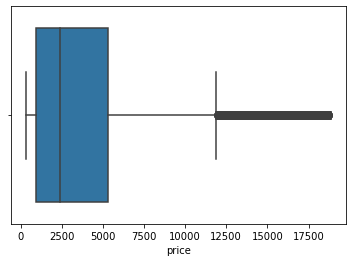

In [14]:
sns.boxplot(df['price'])

In [15]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [17]:
## Removing outliers
numeric_columns = ['price','x','depth','table','z','y']
for c in numeric_columns:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3-Q1
    df = df[~((df[c] < (Q1 - 1.5 * IQR)) | (df[c] > (Q3 + 1.5 * IQR)))] 

In [18]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,47277.000000,47277.000000,47277.000000,47277.000000,47277.000000,47277.000000,47277.000000,47277.000000
mean,27210.987880,0.712171,61.803560,57.246261,3128.049686,5.551907,5.556726,3.432638
std,15964.758224,0.378483,1.078631,2.014565,2774.731105,0.988861,0.982706,0.612088
min,1.000000,0.200000,59.000000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,12951.000000,0.380000,61.200000,56.000000,891.000000,4.640000,4.650000,2.860000
50%,29013.000000,0.600000,61.900000,57.000000,2066.000000,5.440000,5.460000,3.360000
75%,41254.000000,1.010000,62.500000,59.000000,4659.000000,6.410000,6.410000,3.980000
max,53940.000000,2.770000,64.600000,63.500000,11883.000000,8.930000,8.830000,5.580000


C:\Users\RAMBO\anaconda3\envs\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

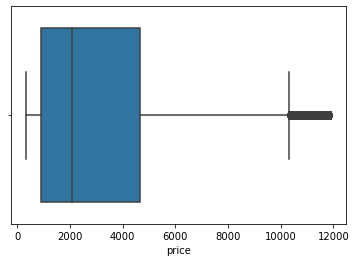

In [19]:
sns.boxplot(df['price'])

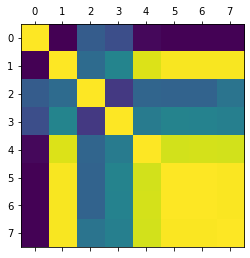

In [20]:
# For seeing Corolation
plt.matshow(df.corr())
plt.show()

<AxesSubplot:>

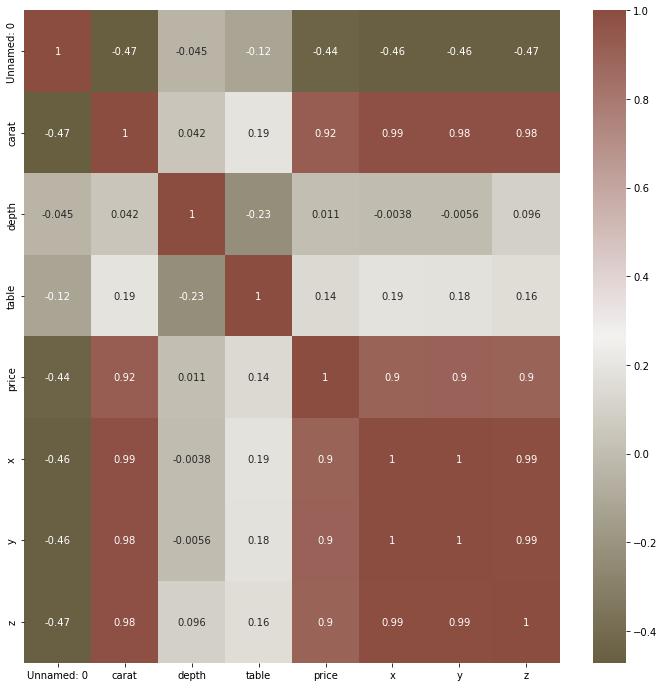

In [21]:
##Correlation
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6, as_cmap=True)
matrix_cor_ucun = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix_cor_ucun,cmap=cmap,annot=True)

In [22]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

     

In [23]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [24]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [25]:
 df['cut'].astype('category').cat.codes

0        2
1        3
3        3
4        1
5        4
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Length: 47277, dtype: int8

In [26]:
##Encoding Characters into Numeric
cut_class_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5, }
clarity_dict   = {'SI2': 2, 'SI1': 3, 'VS1': 5, 'VS2': 4, 'VVS2': 6, 'VVS1': 7, 'I1': 1, 'IF': 8 }
color_dict     = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 5,'D': 5,} 

df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

In [27]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,5,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,5,3,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48


In [28]:
import sklearn
from sklearn import preprocessing

In [29]:
##shuffling data
df = sklearn.utils.shuffle(df)

In [30]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
50101,50102,0.71,3,3,3,63.5,57.0,2207,5.67,5.63,3.59
22293,22294,1.29,4,5,5,60.9,58.0,10341,6.97,7.01,4.26
15662,15663,1.35,5,1,3,62.3,57.0,6281,7.02,7.08,4.39
30982,30983,0.37,4,5,4,62.7,58.0,746,4.55,4.58,2.86
16995,16996,1.01,3,5,4,63.4,60.0,6787,6.37,6.31,4.02


In [31]:
X = df.drop('price',axis=1).values # X use all columns except "Price" 
#X = preprocessing.scale(X)
y = df['price'].values # Y use 'Price' 's values

In [32]:
X.shape

(47277, 10)

In [33]:
X

array([[5.0102e+04, 7.1000e-01, 3.0000e+00, ..., 5.6700e+00, 5.6300e+00,
        3.5900e+00],
       [2.2294e+04, 1.2900e+00, 4.0000e+00, ..., 6.9700e+00, 7.0100e+00,
        4.2600e+00],
       [1.5663e+04, 1.3500e+00, 5.0000e+00, ..., 7.0200e+00, 7.0800e+00,
        4.3900e+00],
       ...,
       [6.2630e+03, 1.0100e+00, 2.0000e+00, ..., 6.4400e+00, 6.4900e+00,
        3.8400e+00],
       [3.0749e+04, 3.4000e-01, 5.0000e+00, ..., 4.4800e+00, 4.5300e+00,
        2.8000e+00],
       [6.7860e+03, 1.1300e+00, 4.0000e+00, ..., 6.6600e+00, 6.6200e+00,
        4.1000e+00]])

In [34]:
y.shape

(47277,)

In [35]:
y

array([ 2207, 10341,  6281, ...,  4011,   740,  4113], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state =42)

In [37]:
##scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X_test.size

94560

In [39]:
import tensorflow as tf

In [54]:
## adding layers
tf.random.set_seed(42) 
Diamonds_model =  tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

In [55]:
Diamonds_model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(0.002), # Adam
            metrics=["mae", "mse"])

In [69]:
history = Diamonds_model.fit(X_train, y_train, batch_size = 10, epochs = 30, verbose = 1, validation_split=0.2)

Train on 30256 samples, validate on 7565 samples
Epoch 1/30
30256/30256 [==============================] - 5s 168us/sample - loss: 79.6787 - mae: 79.6787 - mse: 34373.6211 - val_loss: 74.0466 - val_mae: 74.0467 - val_mse: 34135.5469
Epoch 2/30
30256/30256 [==============================] - 5s 167us/sample - loss: 73.9345 - mae: 73.9345 - mse: 29823.7793 - val_loss: 67.3657 - val_mae: 67.3657 - val_mse: 30464.8848
Epoch 3/30
30256/30256 [==============================] - 5s 166us/sample - loss: 68.1980 - mae: 68.1980 - mse: 25776.2012 - val_loss: 60.7817 - val_mae: 60.7816 - val_mse: 24433.4199
Epoch 4/30
30256/30256 [==============================] - 5s 166us/sample - loss: 61.0510 - mae: 61.0509 - mse: 20493.3691 - val_loss: 58.7569 - val_mae: 58.7569 - val_mse: 21021.5996
Epoch 5/30
30256/30256 [==============================] - 5s 167us/sample - loss: 56.7613 - mae: 56.7613 - mse: 17454.5176 - val_loss: 52.3986 - val_mae: 52.3985 - val_mse: 18027.9902
Epoch 6/30
30256/30256 [=======

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [71]:
##getting the MAE and MSE for the entire dataset
y_pred = Diamonds_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2:  {r2_score(y_test, y_pred)}')

MAE: 22.853861400520337
MSE: 2495.773665382221
R2:  0.9996750138129045


In [72]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


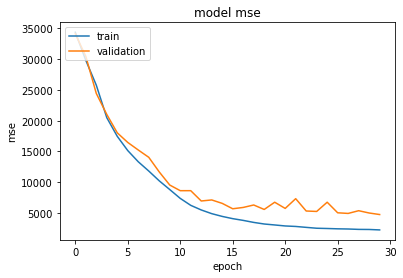

In [73]:
## MSE for train and validation
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

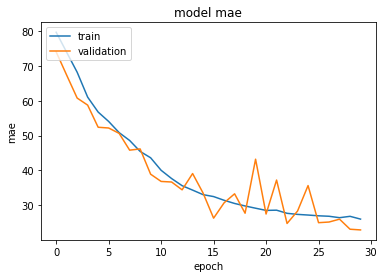

In [74]:
## MAE for train and validation
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [76]:
y_pred = Diamonds_model.predict(X_test)

In [77]:
y_pred

array([[ 1556.6606 ],
       [ 1320.7565 ],
       [ 1363.9314 ],
       ...,
       [10518.781  ],
       [  761.45026],
       [ 6715.7456 ]], dtype=float32)

In [78]:
y_test

array([ 1583,  1323,  1367, ..., 10428,   761,  6612], dtype=int64)

In [80]:
Diamonds_model.evaluate(X_test, y_test)

9456/9456 [==============================] - 0s 31us/sample - loss: 22.8539 - mae: 22.8539 - mse: 2495.7725


[22.853861400520337, 22.853868, 2495.7725]